In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
df.shape

(21613, 21)

In [22]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
#figure out age of building
df['age'] = [2015-i for i in df.yr_built]

# Switch to datetime
df.date = [i[:8] for i in df.date]
df.date = pd.to_datetime(df.date)

# create year and month columns to predict feature price
df['year'] = [i.year for i in df.date]
df['date'] = [i.month for i in df.date]


# transform the grade in 5 category
df['grade'] = [1 if x <4 else 2 if x>3 and x<7 else 3 if x>6 and x<9 else 4 if x>8 and x<11 else 5  for x in df.grade]

In [24]:
# drop the unnecessary columns
df = df.drop(['id', 'lat', 'long', 'yr_built', 'yr_renovated'], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,year
0,10,221900.0,3,1.00,1180,5650,1.0,0,0,3,3,1180,0,98178,1340,5650,60,2014
1,12,538000.0,3,2.25,2570,7242,2.0,0,0,3,3,2170,400,98125,1690,7639,64,2014
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,2,770,0,98028,2720,8062,82,2015
3,12,604000.0,4,3.00,1960,5000,1.0,0,0,5,3,1050,910,98136,1360,5000,50,2014
4,2,510000.0,3,2.00,1680,8080,1.0,0,0,3,3,1680,0,98074,1800,7503,28,2015


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
date             21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
zipcode          21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
age              21613 non-null int64
year             21613 non-null int64
dtypes: float64(3), int64(15)
memory usage: 3.0 MB


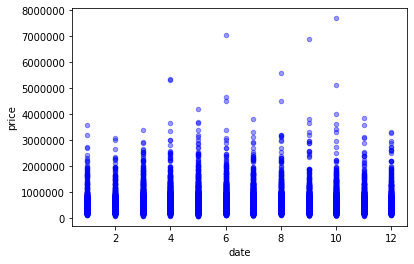

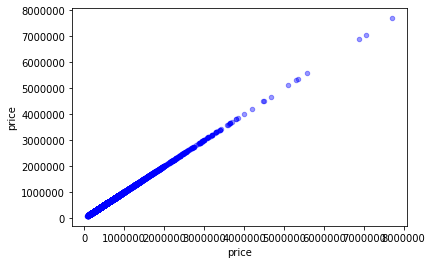

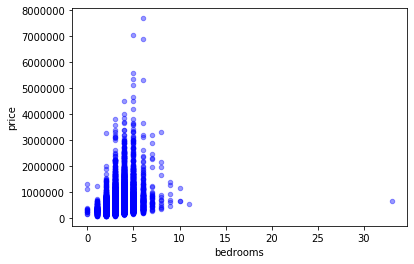

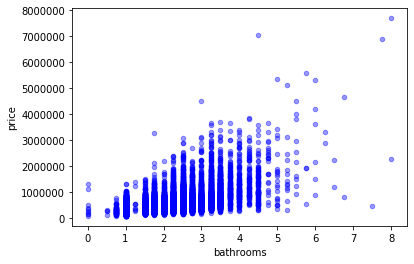

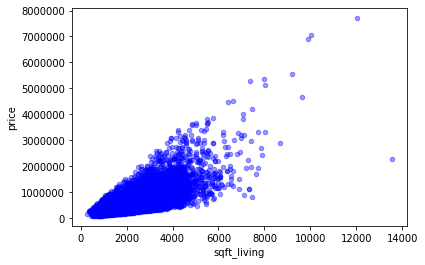

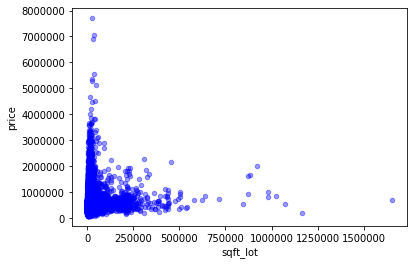

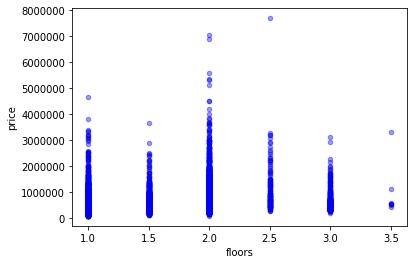

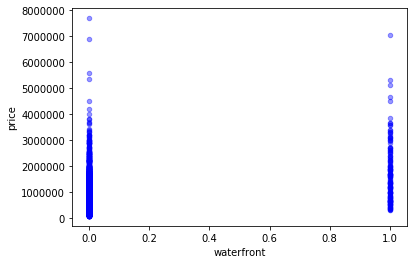

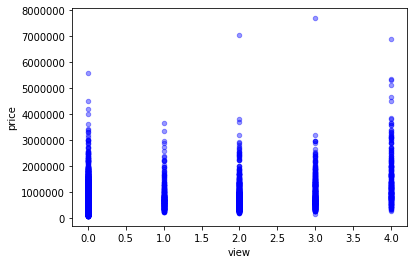

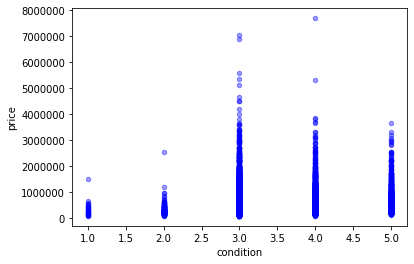

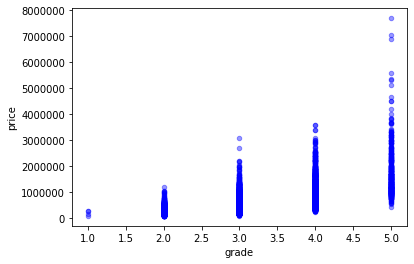

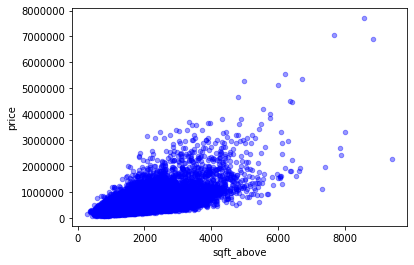

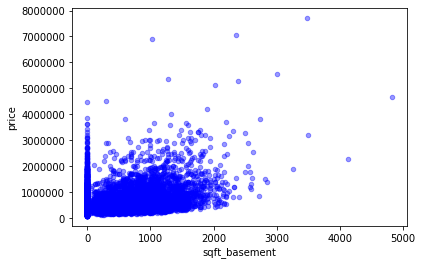

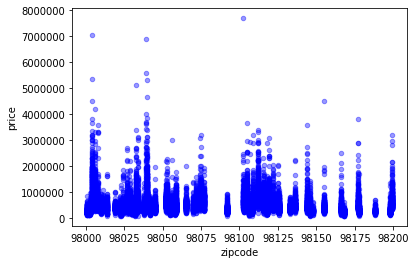

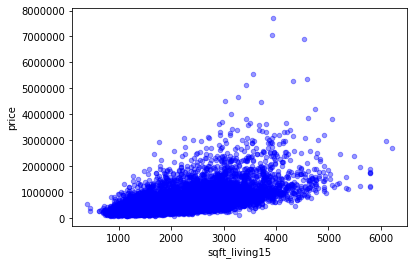

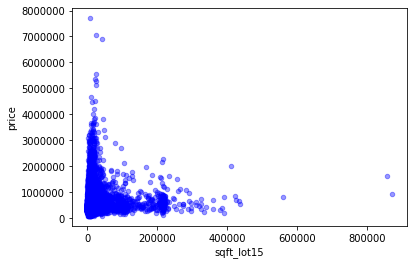

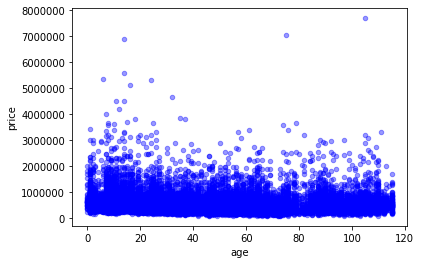

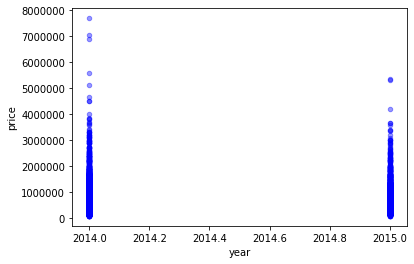

In [26]:
# see relation outcomes to independent columns
for xcol in df.columns:
    df.plot(kind='scatter', x=xcol, y='price', alpha=0.4, color='b')

In [6]:
df.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,year
date,1.000000,-0.010081,-0.001533,0.007392,0.011810,-0.002369,0.014005,0.008132,-0.005638,0.021978,0.008988,0.009872,0.006035,-0.000171,0.002449,0.003546,0.006226,-0.782389
price,-0.010081,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.613271,0.605567,0.323816,-0.053203,0.585379,0.082447,-0.054012,0.003576
bedrooms,-0.001533,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.346952,0.477600,0.303093,-0.152668,0.391638,0.029244,-0.154178,-0.009838
bathrooms,0.007392,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.603439,0.685342,0.283770,-0.203866,0.568634,0.087175,-0.506019,-0.026596
sqft_living,0.011810,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.706007,0.876597,0.435043,-0.199430,0.756420,0.183286,-0.318049,-0.029038
sqft_lot,-0.002369,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.107565,0.183512,0.015286,-0.129574,0.144608,0.718557,-0.053080,0.005468
floors,0.014005,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.391821,0.523885,-0.245705,-0.059121,0.279885,-0.011269,-0.489319,-0.022315
waterfront,0.008132,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.071744,0.072075,0.080588,0.030285,0.086463,0.030703,0.026161,-0.004165
view,-0.005638,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.224048,0.167649,0.276947,0.084827,0.280439,0.072575,0.053440,0.001364
condition,0.021978,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.125325,-0.158214,0.174105,0.003026,-0.092824,-0.003406,0.361417,-0.045589


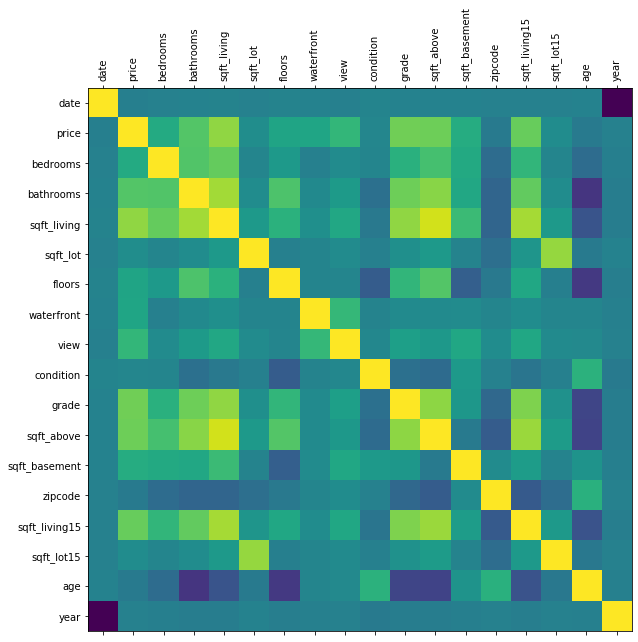

In [7]:
# see correlation of columns
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90);
plt.yticks(range(len(corr.columns)), corr.columns);

In [36]:
# switch categorical columns to dummies variables
df_dummies = pd.get_dummies(df, prefix = ['zipcode_', 'date_', 'grade_', 'condition_','waterfront_', 'view_'], columns = ['zipcode', 'date', 'grade','condition', 'waterfront', 'view'], drop_first= True)

In [37]:
df_dummies.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade__5,condition__2,condition__3,condition__4,condition__5,waterfront__1,view__1,view__2,view__3,view__4
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1340,5650,...,0,0,1,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1690,7639,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0,2720,8062,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# create outcomes and independent to train 
y = df_dummies.price
X = df_dummies.drop(['price'], axis = 1)

In [39]:
# split the data to train and test
# %75 data for training %25 of data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 1234)

# scale the train and test data
scale = StandardScaler().fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)


y_train = np.log(y_train)
y_test = np.log(y_test)

In [40]:
# create linear regression model
reg = LinearRegression().fit(X_train_scale, y_train)

# print out r^2 and mse score for linear regression model
print('Training r^2 :', reg.score(X_train_scale, y_train))
print('Training Mean Square Error', mean_squared_error(y_train, reg.predict(X_train_scale)))
print('Testing r^2 :', reg.score(X_test_scale, y_test))
print('Testing Mean Square Error', mean_squared_error(y_test, reg.predict(X_test_scale)))

Training r^2 : 0.8779693479774064
Training Mean Square Error 0.03399146367111054
Testing r^2 : 0.8715713683619674
Testing Mean Square Error 0.03517522971225103


In [13]:
# create Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scale, y_train)

# print out r^2 and mse score for Ridge regression model
print('Training r^2:', ridge.score(X_train_scale, y_train))
print('Training Mean Square Error:', mean_squared_error(y_train, ridge.predict(X_train_scale)))
print('Testing r^2:', ridge.score(X_test_scale, y_test))
print('Testing Mean Square Error:', mean_squared_error(y_test, ridge.predict(X_test_scale)))

Training r^2: 0.8771289911412541
Training Mean Square Error: 0.03422554386648273
Testing r^2: 0.8713668507118304
Testing Mean Square Error: 0.035231244910980654


In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
outcome = 'price'
mm = df_dummies.drop(['price'], axis = 1)
pred_sum = "+".join(mm.columns)
formula = outcome + "~" + pred_sum

In [44]:
model = ols(formula= formula, data=df_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     960.9
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:26:08   Log-Likelihood:            -2.8898e+05
No. Observations:               21613   AIC:                         5.782e+05
Df Residuals:                   21509   BIC:                         5.790e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.259e+08   1.45e+07     -8.710      0.000   -1.54e+08   -9.76e+07
bedrooms       -2.047e+04   1498.463    -13.657      0.000   -2.34e+04   -1.75e+04
bathrooms       3.112e+04   2523.029     12.332      0.000    2.62e+04    3.61e+04
sqft_living      108.6799      1.761     61.732      0.000     105.229     112.131
sqft_lot           0.2417      0.037      6.496      0.000       0.169       0.315
floors         -3.251e+04   3060.967    -10.619      0.000   -3.85e+04   -2.65e+04
sqft_above        87.0018      1.846     47.131      0.000      83.384      90.620
sqft_basement     21.5800      2.109     10.235      0.000      17.447      25.713
sqft_living15     16.2675      2.772      5.869      0.000      10.835      21.700
sqft_lot15        -0.1516      0.058     -2.594      0.009      -0.266      -0.037
age              404.4356     59.610      6.785      0.000     287.596     521.275
year            6.244e+04   7172.836      8.706      0.000    4.84e+04    7.65e+04
zipcode__98002  5884.5166   1.38e+04      0.427      0.669   -2.11e+04    3.29e+04
zipcode__98003   666.1873   1.24e+04      0.054      0.957   -2.36e+04     2.5e+04
zipcode__98004  7.786e+05   1.21e+04     64.140      0.000    7.55e+05    8.02e+05
zipcode__98005  3.159e+05   1.47e+04     21.556      0.000    2.87e+05    3.45e+05
zipcode__98006  2.695e+05    1.1e+04     24.590      0.000    2.48e+05    2.91e+05
zipcode__98007  2.651e+05   1.55e+04     17.109      0.000    2.35e+05    2.95e+05
zipcode__98008  2.663e+05   1.24e+04     21.471      0.000    2.42e+05    2.91e+05
zipcode__98010  6.423e+04   1.77e+04      3.636      0.000    2.96e+04    9.89e+04
zipcode__98011  1.321e+05   1.39e+04      9.537      0.000    1.05e+05    1.59e+05
zipcode__98014    8.6e+04   1.65e+04      5.221      0.000    5.37e+04    1.18e+05
zipcode__98019  9.019e+04    1.4e+04      6.433      0.000    6.27e+04    1.18e+05
zipcode__98022 -7445.2474   1.33e+04     -0.561      0.575   -3.34e+04    1.86e+04
zipcode__98023 -2.257e+04   1.08e+04     -2.099      0.036   -4.36e+04   -1489.284
zipcode__98024  1.482e+05   1.94e+04      7.639      0.000     1.1e+05    1.86e+05
zipcode__98027  1.748e+05   1.13e+04     15.472      0.000    1.53e+05    1.97e+05
zipcode__98028  1.319e+05   1.24e+04     10.665      0.000    1.08e+05    1.56e+05
zipcode__98029  2.286e+05    1.2e+04     19.038      0.000    2.05e+05    2.52e+05
zipcode__98030  4805.1260   1.27e+04      0.378      0.705   -2.01e+04    2.97e+04
zipcode__98031   1.67e+04   1.25e+04      1.339      0.180   -7739.907    4.11e+04
zipcode__98032  1.343e+04   1.62e+04      0.831      0.406   -1.83e+04    4.51e+04
zipcode__98033  3.713e+05   1.11e+04     33.358      0.000     3.5e+05    3.93e+05
zipcode__98034  2.046e+05   1.06e+04     19.360      0.000    1.84e+05    2.25e+05
zipcode__980

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


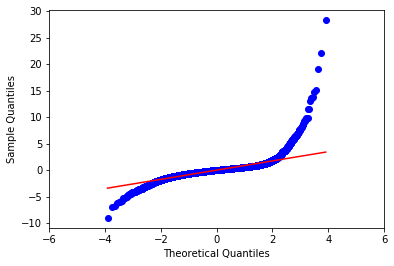

In [45]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='r', fit=True)
plt.xlim((-6,6))
# plt.ylim((-6,6))

fig.show()